In [3]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [4]:
#create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
#create a list for holding the cities
cities=[]
#identify the nearest cit;y for  each latitiude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the citty is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
#starting url fro weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=754d73b37a46d4b7c3ec3c5fd60f9874


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1 
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    #group cities intosets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        recrd_count =1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | restrepo
Processing Record 2 of Set 1 | letogo
City not found. Skipping...
Processing Record 3 of Set 1 | sofiysk
City not found. Skipping...
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | lohja
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | barentsburg
City not found. Skipp

Processing Record 183 of Set 4 | cayenne
Processing Record 184 of Set 4 | thompson
Processing Record 185 of Set 4 | san patricio
Processing Record 186 of Set 4 | aneho
Processing Record 187 of Set 4 | khatanga
Processing Record 188 of Set 4 | tiznit
Processing Record 189 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 190 of Set 4 | nelson bay
Processing Record 191 of Set 4 | kavaratti
Processing Record 192 of Set 4 | dunedin
Processing Record 193 of Set 4 | jiaozuo
Processing Record 194 of Set 4 | muzquiz
City not found. Skipping...
Processing Record 195 of Set 4 | hualmay
Processing Record 196 of Set 4 | dekoa
City not found. Skipping...
Processing Record 197 of Set 4 | chicla
Processing Record 198 of Set 4 | okha
Processing Record 199 of Set 4 | kjollefjord
Processing Record 200 of Set 4 | brcko
Processing Record 201 of Set 5 | lata
Processing Record 202 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 203 of Set 5 | ribeira brava
Processing

Processing Record 367 of Set 8 | kota kinabalu
Processing Record 368 of Set 8 | ancud
Processing Record 369 of Set 8 | hami
Processing Record 370 of Set 8 | lovozero
Processing Record 371 of Set 8 | shakawe
Processing Record 372 of Set 8 | hamilton
Processing Record 373 of Set 8 | bathsheba
Processing Record 374 of Set 8 | aykhal
Processing Record 375 of Set 8 | chagda
City not found. Skipping...
Processing Record 376 of Set 8 | waipawa
Processing Record 377 of Set 8 | basna
Processing Record 378 of Set 8 | balaipungut
Processing Record 379 of Set 8 | otradnoye
Processing Record 380 of Set 8 | juneau
Processing Record 381 of Set 8 | torbay
Processing Record 382 of Set 8 | manaira
Processing Record 383 of Set 8 | igrim
Processing Record 384 of Set 8 | korla
Processing Record 385 of Set 8 | upata
Processing Record 386 of Set 8 | kupang
Processing Record 387 of Set 8 | houma
Processing Record 388 of Set 8 | pimentel
Processing Record 389 of Set 8 | onega
Processing Record 390 of Set 8 | f

Processing Record 549 of Set 11 | lorengau
Processing Record 550 of Set 11 | karpogory
Processing Record 551 of Set 12 | udachnyy
Processing Record 552 of Set 12 | abha
Processing Record 553 of Set 12 | barra
Processing Record 554 of Set 12 | puerto escondido
Processing Record 555 of Set 12 | lazaro cardenas
Processing Record 556 of Set 12 | razdolnoye
Processing Record 557 of Set 12 | gezing
Processing Record 558 of Set 12 | atyrau
Processing Record 559 of Set 12 | tecoanapa
Processing Record 560 of Set 12 | pimenta bueno
Processing Record 561 of Set 12 | abu kamal
Processing Record 562 of Set 12 | arona
Processing Record 563 of Set 12 | puerto quijarro
Processing Record 564 of Set 12 | muravlenko
Processing Record 565 of Set 12 | rio grande
Processing Record 566 of Set 12 | emerald
Processing Record 567 of Set 12 | elk plain
Processing Record 568 of Set 12 | esperance
Processing Record 569 of Set 12 | caravelas
Processing Record 570 of Set 12 | kulhudhuffushi
Processing Record 571 of

In [14]:
len(city_data)

567

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Restrepo,3.8220,-76.5224,71.94,97,100,3.27,CO,2022-05-25 02:15:16
1,Lohja,60.2486,24.0653,50.38,61,12,4.81,FI,2022-05-25 02:15:17
2,Geraldton,-28.7667,114.6000,68.41,73,76,12.66,AU,2022-05-25 02:15:17
3,Yellowknife,62.4560,-114.3525,50.56,29,14,11.01,CA,2022-05-25 02:11:39
4,Bredasdorp,-34.5322,20.0403,56.35,87,100,5.01,ZA,2022-05-25 02:15:18
5,Dikson,73.5069,80.5464,28.29,75,100,6.98,RU,2022-05-25 02:15:19
6,Ushuaia,-54.8000,-68.3000,38.86,60,40,28.77,AR,2022-05-25 02:07:18
7,Vila Franca Do Campo,37.7167,-25.4333,59.20,80,11,5.35,PT,2022-05-25 02:15:19
8,Busselton,-33.6500,115.3333,62.96,69,99,2.84,AU,2022-05-25 02:15:20
9,Ponta Do Sol,32.6667,-17.1000,65.03,62,50,8.68,PT,2022-05-25 02:15:20


In [18]:
#assign new column order
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Restrepo,CO,2022-05-25 02:15:16,3.8220,-76.5224,71.94,97,100,3.27
1,Lohja,FI,2022-05-25 02:15:17,60.2486,24.0653,50.38,61,12,4.81
2,Geraldton,AU,2022-05-25 02:15:17,-28.7667,114.6000,68.41,73,76,12.66
3,Yellowknife,CA,2022-05-25 02:11:39,62.4560,-114.3525,50.56,29,14,11.01
4,Bredasdorp,ZA,2022-05-25 02:15:18,-34.5322,20.0403,56.35,87,100,5.01
...,...,...,...,...,...,...,...,...,...
562,Anadyr,RU,2022-05-25 02:30:51,64.7500,177.4833,59.50,51,0,6.71
563,Myra,IT,2022-05-25 02:30:51,45.4358,12.1348,64.38,86,40,9.22
564,Brigantine,US,2022-05-25 02:26:56,39.4101,-74.3646,58.05,85,100,10.36
565,Harnosand,SE,2022-05-25 02:30:52,62.6323,17.9379,48.20,86,94,5.08


In [20]:
#create an output file (csv)
output_data_file="weather_data/cities.csv"
#export the city_data to aa csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
#extract releveant fields from teh dataframe
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df['Humidity']
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

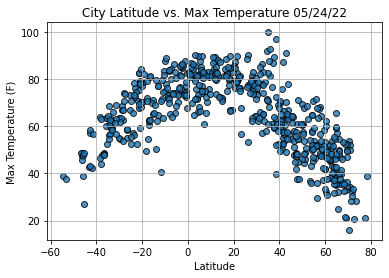

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

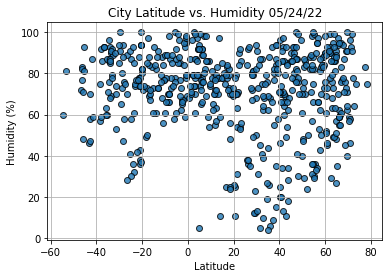

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

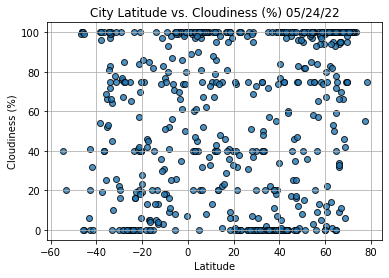

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

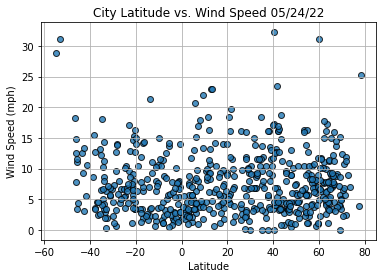

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()